# Analysis of one-year trace of gut microbiome
This notebook records the code used for analyzing data from [Gibbons _et. al._ (2017)](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005364). 

## Load required packages

In [1]:
library(beem)
library(grid)
library(ggplot2)
library(ggsci)
library(igraph)
library(reshape2)

Loading required package: foreach
Loading required package: doMC
Loading required package: iterators
Loading required package: parallel

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



## Load functions and data

In [2]:
input.da <- read.table('~/BEEM/vignettes/gibbons_et_al_analysis/DA.counts.txt', head=F, row.names=1)
metadata.da <- read.table('~/BEEM/vignettes//gibbons_et_al_analysis/DA.metadata.txt', head=T)

## For DB, point #74 has extremely high of one species and #180 is sampled too far from the previous time point
input.db <- read.table('~/BEEM/vignettes//gibbons_et_al_analysis/DB.counts.txt', head=F, row.names=1)[,-c(74,180)]
metadata.db <- read.table('~/BEEM/vignettes/gibbons_et_al_analysis/DB.metadata.txt', head=T)[-c(74,180),]

## For M3, data from 330:332 are too far from previous time point
input.m3 <- read.table('~/BEEM/vignettes/gibbons_et_al_analysis/M3.counts.txt', head=F, row.names=1)[,1:329] 
metadata.m3 <- read.table('~/BEEM/vignettes/gibbons_et_al_analysis/M3.metadata.txt', head=T)[1:329,]

input.f4 <- read.table('~/BEEM/vignettes/gibbons_et_al_analysis/F4.counts.txt', head=F, row.names=1) 
metadata.f4 <- read.table('~/BEEM/vignettes/gibbons_et_al_analysis/F4.metadata.txt', head=T)

## Run BEEM

### Individual DA

In [3]:
counts.da <- input.da[-1,] + 0.0001 ## added pseudo value for R>3.5
colnames(counts.da) <- as.character(input.da[1,])
res.da <- EM(dat=counts.da,meta=metadata.da, dev=10, verbose=FALSE,
          min_iter=50, max_iter=100, converge_thre = 1e-4, 
          scaling = 10000, ncpu=4, seed=0)

[!]: Small number (<10) of biological replicates detected. Note that BEEM works best with >10 biological replicates or the time series contains intrinsic infrequent perturbations.
The following species are not recommended due to 0 values:

The following species are not recommended due to their low/high abudances:
552961, 682726, 529021, 188634, 181765, 593352, 302439, 574965, 1809696, 4407174, 4459708, 310391, 177224, 1073276, 586030, 1106789, 851715, 328438, 316489, 198583, 365868
The following species is recommended as the reference:
1111783
BEEM selecting reference species as default...
Reference species: 1111783


### Individual M3

In [4]:
counts.m3 <- input.m3[-1,]
colnames(counts.m3) <- as.character(input.m3[1,])
res.m3 <- EM(dat=counts.m3, meta=metadata.m3,  dev=10, verbose=FALSE,
          min_iter=50, max_iter=100, converge_thre = 1e-4, 
          scaling = 10000, ncpu=4, seed=0)

[!]: Small number (<10) of biological replicates detected. Note that BEEM works best with >10 biological replicates or the time series contains intrinsic infrequent perturbations.
The following species are not recommended due to 0 values:
577562
The following species are not recommended due to their low/high abudances:
367104, 4479888, 4444095, 1136492, 367517, 182497, 577562, 180045, 4348111, 3257594, 340642, 536212, 581021, 938834, 643390, 1110862
The following species is recommended as the reference:
3700151
BEEM selecting reference species as default...
Reference species: 3700151


### Individual DB

In [5]:
counts.db <- input.db[-1,]
colnames(counts.db) <- as.character(input.db[1,])
res.db <- EM(dat=counts.db,meta=metadata.db, dev=10, verbose=FALSE,
          min_iter=50, max_iter=100, converge_thre=1e-4, 
          scaling = 10000, ncpu=4, seed=0)

[!]: Small number (<10) of biological replicates detected. Note that BEEM works best with >10 biological replicates or the time series contains intrinsic infrequent perturbations.
The following species are not recommended due to 0 values:
4297420, 294363, 191633, 1110862, 4414388, 198910
The following species are not recommended due to their low/high abudances:
585220, 1106927, 1111783, 529021, 4361727, 147040, 4297420, 194201, 528935, 520734, 183809, 294363, 191633, 4385756, 152842, 346253, 4407703, 2079328, 1110862, 328438, 316489, 4371419
The following species is recommended as the reference:
682726
BEEM selecting reference species as default...
[!]: The reference species has zero abundance in some samples. This will treated as non-zeros by adding a pseudo count.
Reference species: 682726


### Individual F4

In [6]:
counts.f4 <- input.f4[-1,]
colnames(counts.f4) <- as.character(input.f4[1,])
res.f4 <- EM(dat=counts.f4,meta=metadata.f4, dev=10, verbose=FALSE,
          min_iter=50, max_iter=100, converge_thre=1e-4, 
          scaling = 10000, ncpu=4, seed=0)

[!]: Small number (<10) of biological replicates detected. Note that BEEM works best with >10 biological replicates or the time series contains intrinsic infrequent perturbations.
The following species are not recommended due to 0 values:

The following species are not recommended due to their low/high abudances:
367104, 4479888, 851668, 368324, 358016, 364109, 1105014, 528634, 271563, 1976824, 560336, 531444, 181985, 4435546, 3718952, 3335289, 2430157, 516298, 367394
The following species is recommended as the reference:
193041
BEEM selecting reference species as default...
Reference species: 193041


## Infer parameters

In [7]:
params.da <- paramFromEM(res.da, counts.da, metadata.da, ncpu=4)
params.m3 <- paramFromEM(res.m3, counts.m3, metadata.m3, ncpu=4)
params.db <- paramFromEM(res.db, counts.db, metadata.db, ncpu=4)
params.f4 <- paramFromEM(res.f4, counts.f4, metadata.f4, ncpu=4)

## Functions for analysis

In [8]:
int.net <- function(counts, parms, sig=1, title){
    ## plot interaction network
    minmax <- function(x) (x-min(x))/(max(x)-min(x))
    annote <- read.table('~/BEEM/vignettes/gibbons_et_al_analysis/all_otu_mapping.txt',head=F, row.names=1)
    counts.mean <- rowMeans(counts)
    int <- parms[parms$parameter_type=='interaction' & parms$source_taxon!=parms$target_taxon,]
    int.f <- int[int$significance>sig,2:4]
    g <- graph.data.frame(int.f[,1:2])
    V(g)$color <- annote[V(g)$name,]$V4
    V(g)$size <- log(counts.mean[V(g)$name]) +4
    E(g)$color <- ifelse(int.f$value>0,fill_cols[12],fill_cols[13])
    E(g)$lty <- ifelse(int.f$value>0,1,2)
    E(g)$width <- minmax(abs(int.f$value) ) * 2 + 0.5
    plot(g, main=title,asp=0,edge.arrow.size=0.5,edge.curved=.15)
    return(g)
}

## Biomass trajectory of individual DA
Note the periodic behaviour of the biomass -- the period is around 90 days (i.e. 3 months).

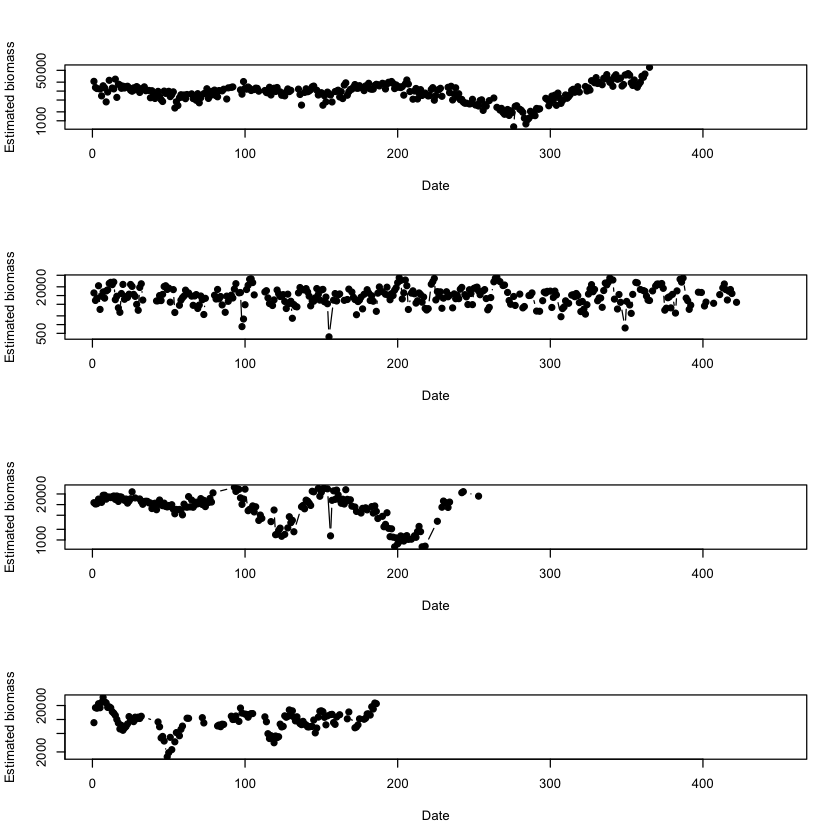

In [9]:
par(mfrow = c(4,1))
plot(x=metadata.da$measurementID,y=biomassFromEM(res.da), xlim=c(0, 450), type='b', pch=19, xlab='Date', ylab='Estimated biomass', log='y')
plot(x=metadata.m3$measurementID,y=biomassFromEM(res.m3), xlim=c(0, 450), type='b', pch=19, xlab='Date', ylab='Estimated biomass', log='y')
plot(x=metadata.db$measurementID,y=biomassFromEM(res.db), xlim=c(0, 450), type='b', pch=19, xlab='Date', ylab='Estimated biomass', log='y')
plot(x=metadata.f4$measurementID,y=biomassFromEM(res.f4), xlim=c(0, 450), type='b', pch=19, xlab='Date', ylab='Estimated biomass', log='y')

## Plot interaction network

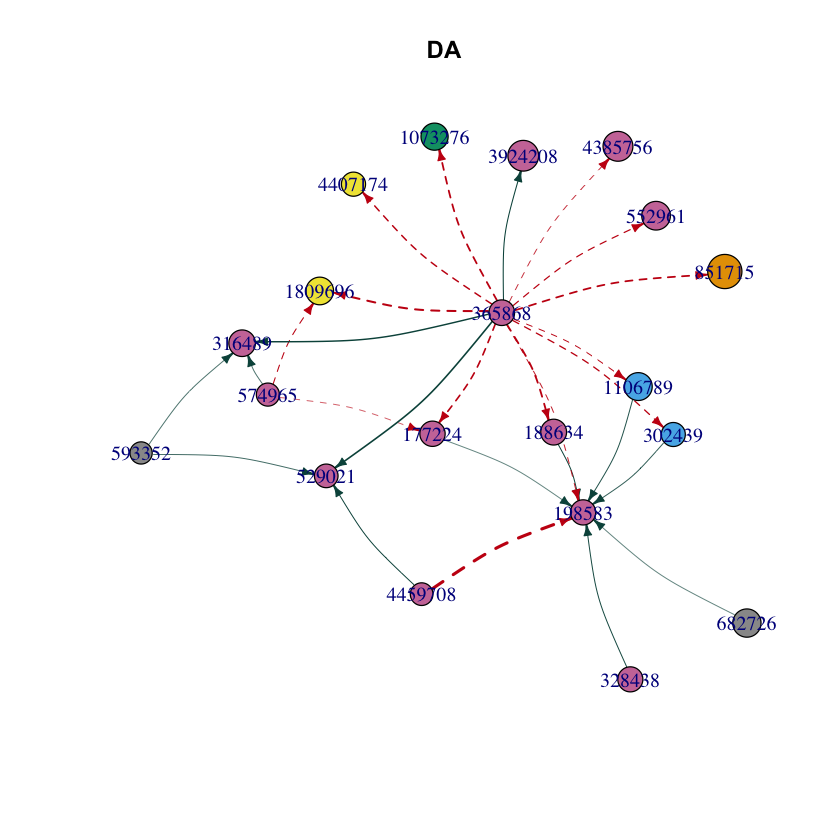

In [10]:
fill_cols <- pal_simpsons(c("springfield"))(16)
ga <- int.net(counts.da, params.da, 1.5, 'DA')

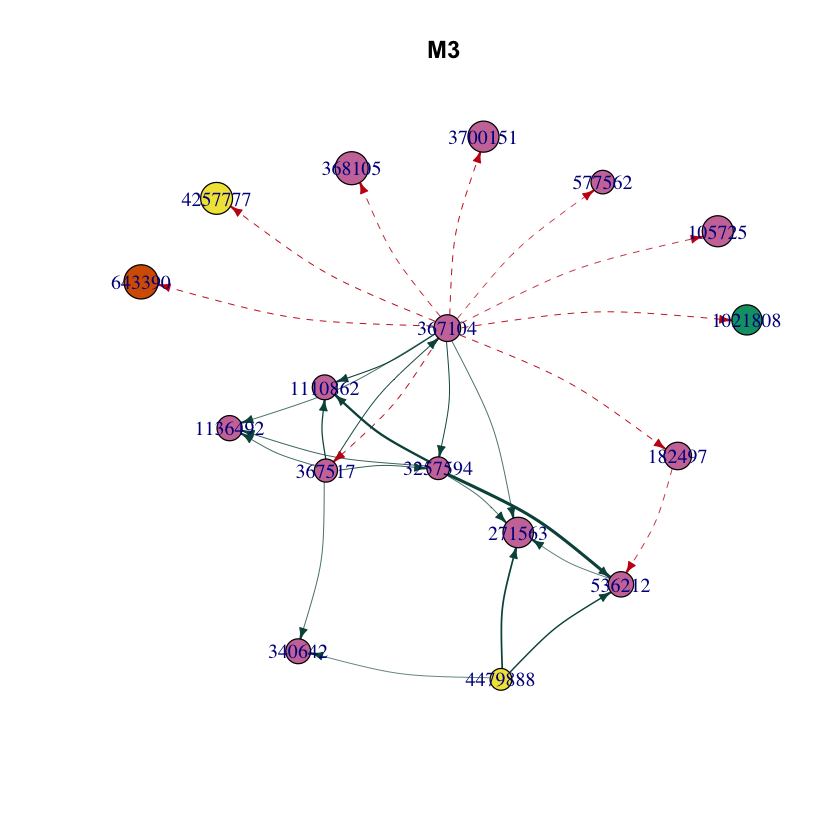

In [11]:
gm <- int.net(counts.m3, params.m3, 1.5, 'M3')

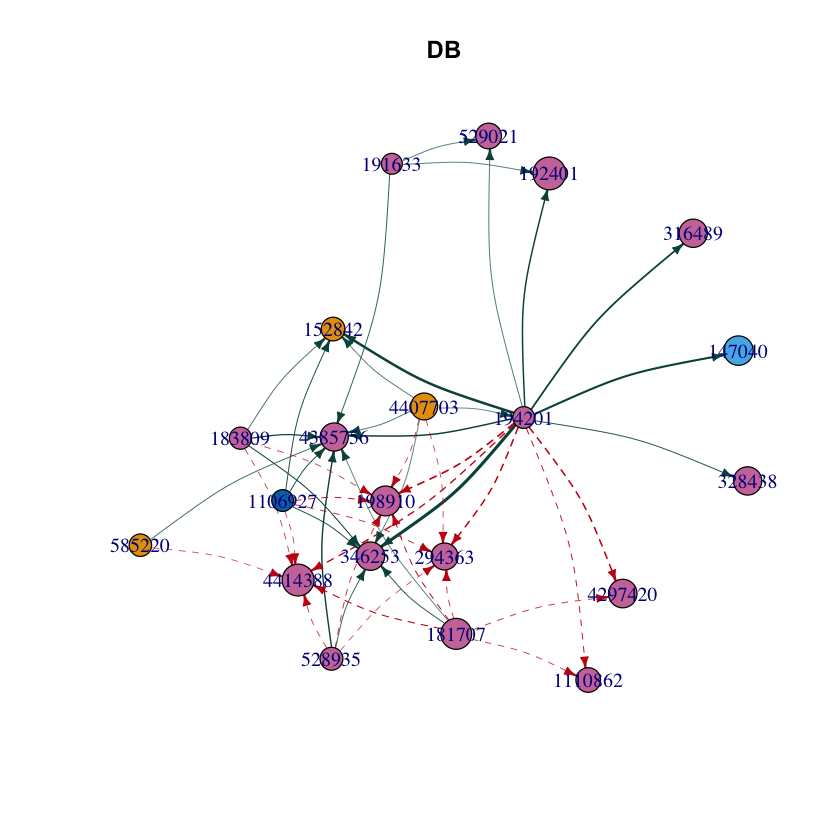

In [12]:
gb <- int.net(counts.db, params.db, 1.5, 'DB')

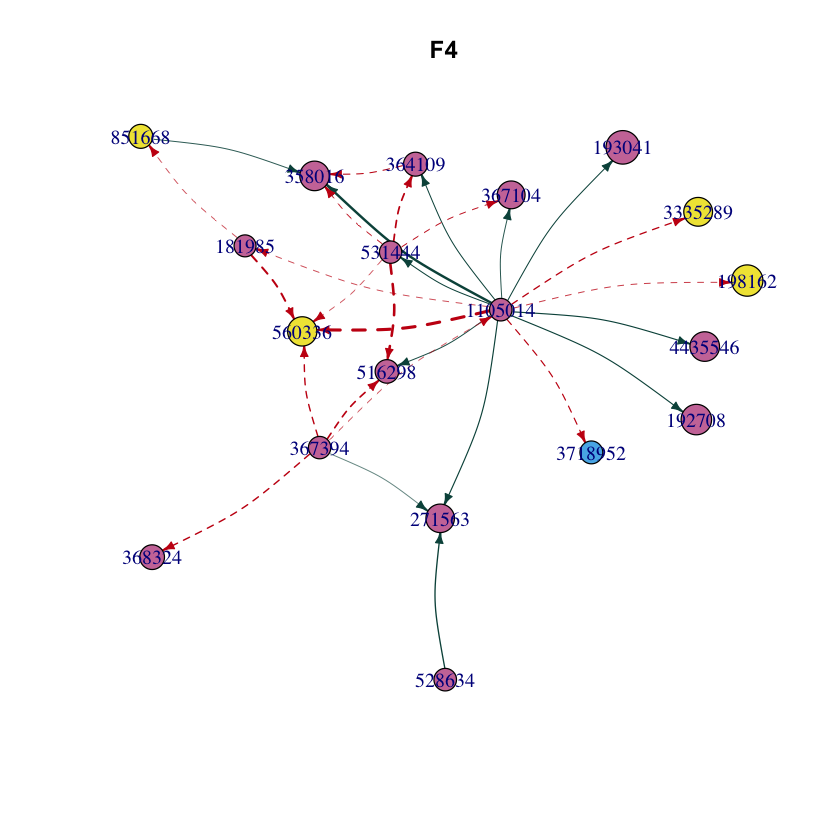

In [13]:
f4 <- int.net(counts.f4, params.f4, 1.5, 'F4')

In [14]:
res.da$counts <- counts.da
res.da$metadata <- metadata.da
saveRDS(res.da, '~/BEEM/vignettes/gibbons_et_al_analysis/DA.EM.rds')
write.table(params.da, '~/BEEM/vignettes/gibbons_et_al_analysis/DA.params.txt', col.names=TRUE, row.names=FALSE, sep='\t', quote=FALSE)

res.m3$counts <- counts.m3
res.m3$metadata <- metadata.m3
saveRDS(res.m3, '~/BEEM/vignettes/gibbons_et_al_analysis/M3.EM.rds')
write.table(params.m3, '~/BEEM/vignettes/gibbons_et_al_analysis/M3.params.txt', col.names=TRUE, row.names=FALSE, sep='\t', quote=FALSE)

res.db$counts <- counts.db
res.db$metadata <- metadata.db
saveRDS(res.db, '~/BEEM/vignettes/gibbons_et_al_analysis/DB.EM.rds')
write.table(params.db, '~/BEEM/vignettes/gibbons_et_al_analysis/DB.params.txt', col.names=TRUE, row.names=FALSE, sep='\t', quote=FALSE)

res.f4$counts <- counts.f4
res.f4$metadata <- metadata.f4
saveRDS(res.f4, '~/BEEM/vignettes/gibbons_et_al_analysis/F4.EM.rds')
write.table(params.f4, '~/BEEM/vignettes/gibbons_et_al_analysis/F4.params.txt', col.names=TRUE, row.names=FALSE, sep='\t', quote=FALSE)

In [15]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS  10.15.5

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] grid      parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
[1] reshape2_1.4.3   igraph_1.2.2     ggsci_2.9        ggplot2_3.3.1   
[5] beem_0.0.0.9000  doMC_1.3.5       iterators_1.0.10 foreach_1.4.4   

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.2       pillar_1.4.2     compiler_3.5.1   plyr_1.8.4      
 [5] base64enc_0.1-3  tools_3.5.1      digest_0.6.22    uuid_0.1-2      
 [9] tibble_2.1.3     jsonlite_1.6     evaluate_0.14    gtable_0.3.0    
[13] pspline_1.0-18   pkgconfig_2.0.3  rlang_0.4.0      IRdisplay_0.7.0 
